In [3]:
import pandas as pd

In [1398]:
df=pd.read_csv("baseball.csv")

In [1399]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [1400]:
#adddind 'RD' column
df['RD']=df['RS']-df['RA']
df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [1401]:
df_nan=df[['RS','RA','W','OBP','SLG','BA','Playoffs','OOBP']]


In [1402]:
df_nan.shape

(1232, 8)

In [1403]:
#preparing data from prediction
dftemptrain=df_nan[df['OOBP'].isnull()!=True]#training data where there are no null values
dftempfin=df_nan[df['OOBP'].isnull()==True]#data for which 'OOBP' must be predicted ,(OOBP with ~Nan values)

In [1404]:
dftempfin.shape

(812, 8)

In [1405]:
dftemptrain.shape

(420, 8)

In [1406]:
from sklearn.neighbors import KNeighborsRegressor

In [1407]:
x=dftemptrain.drop('OOBP',axis=1)
y=dftemptrain['OOBP']

In [1408]:
#fitting the model with train data for prediction

knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [1409]:
dftest=dftempfin[x.columns]

In [1410]:
x.head()

,RS,RA,W,OBP,SLG,BA,Playoffs
0,734,688,81,0.328,0.418,0.259,0
1,700,600,94,0.320,0.389,0.247,1
2,712,705,93,0.311,0.417,0.247,1
3,734,806,69,0.315,0.415,0.260,0
4,613,759,61,0.302,0.378,0.240,0


In [1411]:
dftest.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
dtype: int64

In [1412]:
# ypred=knn.predict(dftest)
# ypred

In [1413]:
dftest['OOBP']=knn.predict(dftest)

In [1414]:
dftest.shape

(812, 8)

In [1415]:
dfcon=pd.concat((dftemptrain,dftest),axis=0)

In [1416]:
dftest.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
OOBP        0
dtype: int64

In [1417]:
dfcon.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
OOBP        0
dtype: int64

In [1418]:
dfcon.corr()

,RS,RA,W,OBP,SLG,BA,Playoffs,OOBP
RS,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,0.309995
RA,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.937414
W,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.547972
OBP,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.272415
SLG,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.364059
BA,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.275716
Playoffs,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,-0.278986
OOBP,0.309995,0.937414,-0.547972,0.272415,0.364059,0.275716,-0.278986,1.000000


In [1419]:
dfcon.shape

(1232, 8)

In [1420]:
dfcon['OSLG']=df['OSLG']

In [1421]:
#preparing data from prediction
dftemptrain=dfcon[dfcon['OSLG'].isnull()!=True]#training data where there are no null values
dftempfin=dfcon[dfcon['OSLG'].isnull()==True]#data for which 'OOBP' must be predicted ,(OOBP with ~Nan values)

In [1422]:
dftempfin.shape

(812, 9)

In [1423]:
dftemptrain.shape

(420, 9)

In [1424]:
from sklearn.neighbors import KNeighborsRegressor

In [1425]:
x=dftemptrain.drop('OSLG',axis=1)
y=dftemptrain['OSLG']

In [1426]:
#fitting the model with train data for prediction

knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [1427]:
dftest=dftempfin[x.columns]

In [1428]:
x.head()

,RS,RA,W,OBP,SLG,BA,Playoffs,OOBP
0,734,688,81,0.328,0.418,0.259,0,0.317
1,700,600,94,0.320,0.389,0.247,1,0.306
2,712,705,93,0.311,0.417,0.247,1,0.315
3,734,806,69,0.315,0.415,0.260,0,0.331
4,613,759,61,0.302,0.378,0.240,0,0.335


In [1429]:
dftest.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
OOBP        0
dtype: int64

In [1430]:
# ypred=knn.predict(dftest)
# ypred

In [1431]:
dftest['OSLG']=knn.predict(dftest)

In [1432]:
dftest.shape

(812, 9)

In [1433]:
dfcon=pd.concat((dftemptrain,dftest),axis=0)

In [1434]:
dftest.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
OOBP        0
OSLG        0
dtype: int64

In [1435]:
dfcon.isnull().sum()

RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
OOBP        0
OSLG        0
dtype: int64

In [1436]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667,2.182660e-18
RS,4.189775e-01,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426,5.462938e-01
RA,4.120202e-01,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319,-5.670477e-01
W,4.138248e-03,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490,9.378511e-01
OBP,3.743545e-01,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372,5.063794e-01
SLG,5.360371e-01,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423,4.228647e-01
BA,3.493972e-01,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808,4.369427e-01
Playoffs,1.457787e-01,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744,5.810944e-01
RankSeason,3.852191e-01,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111,-5.806451e-01
RankPlayoffs,4.439670e-01,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089,-1.312351e-01


In [1437]:
dfcon['OOBP'].sum()

401.76677290984986

In [1438]:
new=dfcon[df['Year']<2002] #data less than year 2002
new.shape

(902, 9)

RS

In [1439]:
x=new[['OBP','SLG']]
y=new['RS']

In [30]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [1441]:
LR=LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1442]:
LR.intercept_

-804.62706106224

In [1443]:
LR.coef_

array([2737.76802227, 1584.90860546])

RA

In [1444]:
x1=new[['OOBP','OSLG']]
y1=new['RA']
LR2=LinearRegression()
LR2.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1445]:
LR2.intercept_

-996.601884779366

In [1446]:
LR2.coef_

array([2485.5503733, 2214.2271838])

Wins

In [1447]:
new['RD']=new['RS']-new['RA']


C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1448]:
x=new[['RD']].values
y=new[['W']].values
w_model=LinearRegression()
w_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1449]:
w_model.intercept_

array([80.88137472])

In [1450]:
w_model.coef_

array([[0.10576562]])

In [1451]:
LR.predict([[0.339,0.430]])

array([804.98699884])

In [1452]:
LR2.predict([[0.307,0.373]])

array([592.36881938])

In [1453]:
804.98699884-592.36881938

212.61817945999996

In [1454]:
w_model.predict([[192.46]])

array([[101.23702642]])

In [1455]:
w_model.score(x,y)

0.8808103719972755

In [1456]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df=pd.read_csv("car_sales.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)

In [1458]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [1459]:
df.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [1460]:
df.groupby('Type').mean()['Price']

Type
Compact    18.212500
Large      24.300000
Midsize    27.218182
Small      10.166667
Sporty     19.392857
Van        19.100000
Name: Price, dtype: float64

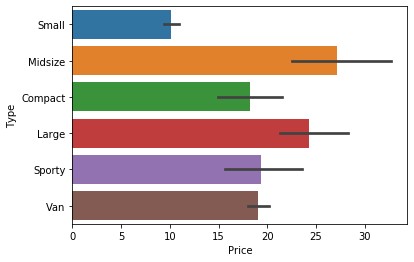

In [1461]:
sns.barplot(df['Price'],df['Type'])

In [1462]:
#import seaborn as sns
#sns.pairplot(df,diag_kind='kde')

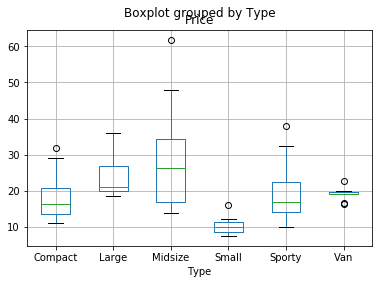

In [1463]:
df.boxplot(column='Price',by='Type')

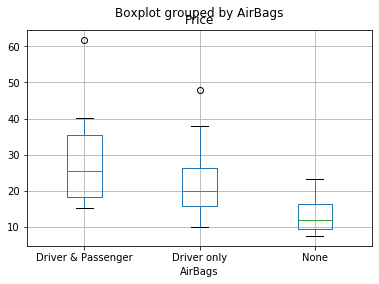

In [1464]:
df.boxplot(column='Price',by='AirBags')

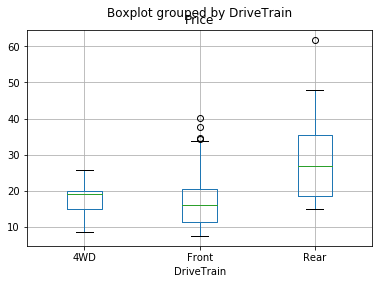

In [1465]:
df.boxplot(column='Price',by='DriveTrain')

In [1466]:
df.groupby('DriveTrain').mean()['Price']

DriveTrain
4WD      17.630000
Front    17.535821
Rear     28.950000
Name: Price, dtype: float64

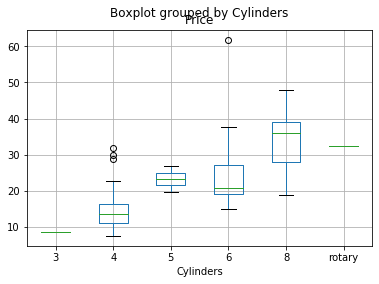

In [1467]:
df.boxplot(column='Price',by='Cylinders')

In [1468]:
df.groupby('Cylinders').mean()['Price']

Cylinders
3          8.466667
4         14.648980
5         23.200000
6         24.380645
8         33.785714
rotary    32.500000
Name: Price, dtype: float64

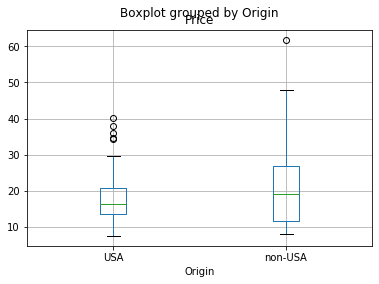

In [1469]:
df.boxplot(column='Price',by='Origin')

In [1470]:
df.groupby('Origin').mean()['Price']

Origin
USA        18.572917
non-USA    20.508889
Name: Price, dtype: float64

In [1471]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats

In [1472]:
dfcy3=df[df['Cylinders']=='3']['Price']
dfcy4=df[df['Cylinders']=='4']['Price']
dfcy5=df[df['Cylinders']=='5']['Price']
dfcy6=df[df['Cylinders']=='6']['Price']
dfcy8=df[df['Cylinders']=='8']['Price']
dfcyr=df[df['Cylinders']=='rotary']['Price']

In [1473]:
dfcy8.isnull().sum()

0

In [1474]:
import scipy.stats as stats
stats.f_oneway(dfcy3,dfcy4,dfcy5,dfcy6,dfcy8,dfcyr)

F_onewayResult(statistic=14.363287536833516, pvalue=3.042776105990462e-10)

MVLR

In [1475]:
df['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

In [1476]:
newdf=df[['Price','MPG.city','MPG.highway','AirBags','Horsepower','EngineSize','Rev.per.mile','Turn.circle','Man.trans.avail','Fuel.tank.capacity','Length','Width','Weight']]

In [1477]:
newdf.shape

(93, 13)

In [1478]:
cols=['AirBags']
newdum=pd.get_dummies(data=newdf,columns=cols)


In [1479]:
newdum.shape

(93, 15)

In [1480]:
newdum

,Price,MPG.city,MPG.highway,Horsepower,EngineSize,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None
0,15.9,25,31,140,1.8,2890,37,1,13.2,177,68,2705,0,0,1
1,33.9,18,25,200,3.2,2335,38,1,18.0,195,71,3560,1,0,0
2,29.1,20,26,172,2.8,2280,37,1,16.9,180,67,3375,0,1,0
3,37.7,19,26,172,2.8,2535,37,1,21.1,193,70,3405,1,0,0
4,30.0,22,30,208,3.5,2545,39,1,21.1,186,69,3640,0,1,0
5,15.7,22,31,110,2.2,2565,41,0,16.4,189,69,2880,0,1,0
6,20.8,19,28,170,3.8,1570,42,0,18.0,200,74,3470,0,1,0
7,23.7,16,25,180,5.7,1320,45,0,23.0,216,78,4105,0,1,0
8,26.3,19,27,170,3.8,1690,41,0,18.8,198,73,3495,0,1,0
9,34.7,16,25,200,4.9,1510,43,0,18.0,206,73,3620,0,1,0


In [1481]:
X=newdum.drop('Price',axis=1)
y=newdum['Price']

In [37]:
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [1483]:
newdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
Price                         93 non-null float64
MPG.city                      93 non-null int64
MPG.highway                   93 non-null int64
Horsepower                    93 non-null int64
EngineSize                    93 non-null float64
Rev.per.mile                  93 non-null int64
Turn.circle                   93 non-null int64
Man.trans.avail               93 non-null int64
Fuel.tank.capacity            93 non-null float64
Length                        93 non-null int64
Width                         93 non-null int64
Weight                        93 non-null int64
AirBags_Driver & Passenger    93 non-null uint8
AirBags_Driver only           93 non-null uint8
AirBags_None                  93 non-null uint8
dtypes: float64(3), int64(9), uint8(3)
memory usage: 9.1 KB


In [1484]:

#optimum no of features to select for RFE
nof_list=np.arange(1,17)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.730556


In [1485]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MPG.city', 'MPG.highway', 'Horsepower', 'EngineSize', 'Turn.circle',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Length', 'Width',
       'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None'],
      dtype='object')


In [1486]:
x=X[['MPG.city', 'MPG.highway', 'Horsepower', 'EngineSize', 'Turn.circle',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Length', 'Width',
       'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None']]

In [1487]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
rmse=np.sqrt(metrics.mean_squared_error(ytest,ypred))
print("RMSE Score : ",rmse)
r2=LR.score(xtrain,ytrain)
print("R2 : ",r2)

RMSE Score :  3.9227061636559473
R2 :  0.7675630193484163


In [1488]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
m4=ElasticNet()

In [1489]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.var(rmse,ddof=1),name))

0.8318950480888033
RMSE scores:5.001 (+/-2.02759)[Linear_Regression]
0.8304683817011432
RMSE scores:5.032 (+/-2.04842)[Ridge]
0.7125351153816535
RMSE scores:5.944 (+/-3.83830)[Lasso]
0.7302188878112933
RMSE scores:5.828 (+/-3.49113)[ElasticNet]


In [1490]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [1491]:
newdf=df[['Price','MPG.city','MPG.highway','AirBags','Horsepower','EngineSize','Luggage.room','Rear.seat.room','Rev.per.mile','Turn.circle','Man.trans.avail','Fuel.tank.capacity','Length','Width','Weight']]

In [1492]:
newdf['Rear.seat.room'].fillna(newdf['Rear.seat.room'].median(),inplace=True)
newdf['Luggage.room'].fillna(newdf['Luggage.room'].median(),inplace=True)

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [1493]:
newdf.shape

(93, 15)

In [1494]:
cols=['AirBags']
newdum=pd.get_dummies(data=newdf,columns=cols)


In [1495]:
newdum.shape

(93, 17)

In [1496]:
newdum

,Price,MPG.city,MPG.highway,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None
0,15.9,25,31,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1
1,33.9,18,25,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0
2,29.1,20,26,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0
3,37.7,19,26,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0
4,30.0,22,30,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0
5,15.7,22,31,110,2.2,16.0,28.0,2565,41,0,16.4,189,69,2880,0,1,0
6,20.8,19,28,170,3.8,17.0,30.5,1570,42,0,18.0,200,74,3470,0,1,0
7,23.7,16,25,180,5.7,21.0,30.5,1320,45,0,23.0,216,78,4105,0,1,0
8,26.3,19,27,170,3.8,14.0,26.5,1690,41,0,18.8,198,73,3495,0,1,0
9,34.7,16,25,200,4.9,18.0,35.0,1510,43,0,18.0,206,73,3620,0,1,0


In [1497]:
X=newdum.drop('Price',axis=1)
y=newdum['Price']

In [1498]:
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [1499]:
newdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 17 columns):
Price                         93 non-null float64
MPG.city                      93 non-null int64
MPG.highway                   93 non-null int64
Horsepower                    93 non-null int64
EngineSize                    93 non-null float64
Luggage.room                  93 non-null float64
Rear.seat.room                93 non-null float64
Rev.per.mile                  93 non-null int64
Turn.circle                   93 non-null int64
Man.trans.avail               93 non-null int64
Fuel.tank.capacity            93 non-null float64
Length                        93 non-null int64
Width                         93 non-null int64
Weight                        93 non-null int64
AirBags_Driver & Passenger    93 non-null uint8
AirBags_Driver only           93 non-null uint8
AirBags_None                  93 non-null uint8
dtypes: float64(5), int64(9), uint8(3)
memory usage: 10.5 KB


In [1500]:

#optimum no of features to select for RFE
nof_list=np.arange(1,17)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 14
Score with 14 features: 0.753301


In [1501]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MPG.highway', 'Horsepower', 'EngineSize', 'Luggage.room',
       'Rear.seat.room', 'Turn.circle', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Width', 'AirBags_Driver & Passenger',
       'AirBags_Driver only', 'AirBags_None'],
      dtype='object')


In [1502]:
x=X[['MPG.highway', 'Horsepower', 'EngineSize', 'Luggage.room',
       'Rear.seat.room', 'Turn.circle', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Width', 'AirBags_Driver & Passenger',
       'AirBags_Driver only', 'AirBags_None']]

In [1503]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
rmse=np.sqrt(metrics.mean_squared_error(ytest,ypred))
print("RMSE Score : ",rmse)
r2=LR.score(xtrain,ytrain)
print("R2 : ",r2)

RMSE Score :  3.790304418077149
R2 :  0.7701840852446971


In [1504]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
m4=ElasticNet()

In [1505]:
models=[]
models.append(('MVLR',m1))
models.append(('Ridge',m2))
models.append(('Lasso',m3))
models.append(('ElasticNet',m4))

In [38]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  model_selection

MVLR: 4.913298 (1.177395)
Ridge: 4.913298 (1.177395)
Lasso: 4.913298 (1.177395)
ElasticNet: 4.913298 (1.177395)


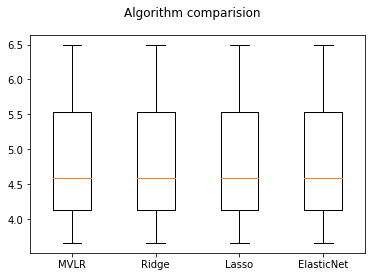

In [1507]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(m1,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1508]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.var(rmse,ddof=1),name))

0.835911716963414
RMSE scores:4.913 (+/-2.07939)[Linear_Regression]
0.8345355588724025
RMSE scores:4.956 (+/-2.07246)[Ridge]
0.7114523795715324
RMSE scores:6.067 (+/-3.72055)[Lasso]
0.73243140680489
RMSE scores:5.919 (+/-3.50321)[ElasticNet]


PolynomialFeatures

In [1509]:
from sklearn.preprocessing import PolynomialFeatures

In [1510]:
X.head()

,MPG.city,MPG.highway,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None
0,25,31,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1
1,18,25,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0
2,20,26,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0
3,19,26,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0
4,22,30,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0


In [1511]:
xml=X[['MPG.city','MPG.highway']]

In [1512]:
qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(xml)
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5
0,1.0,25.0,31.0,625.0,775.0,961.0
1,1.0,18.0,25.0,324.0,450.0,625.0
2,1.0,20.0,26.0,400.0,520.0,676.0
3,1.0,19.0,26.0,361.0,494.0,676.0
4,1.0,22.0,30.0,484.0,660.0,900.0


In [1513]:
x_qr_df.drop(0,axis=1,inplace=True)
x_qr_df.columns=['MPG.city1','MPG.highway1','MPG.city_square','MPG.highway_square','MPG.city_MPG.highway']

In [1514]:
newx=X.drop(['MPG.city','MPG.highway'],axis=1)
df_final=pd.concat([newx,x_qr_df,y],axis=1)

In [1515]:
df_final.shape

(93, 20)

In [1516]:
df_final

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city1,MPG.highway1,MPG.city_square,MPG.highway_square,MPG.city_MPG.highway,Price
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1,25.0,31.0,625.0,775.0,961.0,15.9
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0,18.0,25.0,324.0,450.0,625.0,33.9
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0,20.0,26.0,400.0,520.0,676.0,29.1
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0,19.0,26.0,361.0,494.0,676.0,37.7
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0,22.0,30.0,484.0,660.0,900.0,30.0
5,110,2.2,16.0,28.0,2565,41,0,16.4,189,69,2880,0,1,0,22.0,31.0,484.0,682.0,961.0,15.7
6,170,3.8,17.0,30.5,1570,42,0,18.0,200,74,3470,0,1,0,19.0,28.0,361.0,532.0,784.0,20.8
7,180,5.7,21.0,30.5,1320,45,0,23.0,216,78,4105,0,1,0,16.0,25.0,256.0,400.0,625.0,23.7
8,170,3.8,14.0,26.5,1690,41,0,18.8,198,73,3495,0,1,0,19.0,27.0,361.0,513.0,729.0,26.3
9,200,4.9,18.0,35.0,1510,43,0,18.0,206,73,3620,0,1,0,16.0,25.0,256.0,400.0,625.0,34.7


In [1517]:
X=df_final.drop('Price',axis=1)
y=df_final['Price']

In [1518]:
X.head()

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city1,MPG.highway1,MPG.city_square,MPG.highway_square,MPG.city_MPG.highway
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1,25.0,31.0,625.0,775.0,961.0
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0,18.0,25.0,324.0,450.0,625.0
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0,20.0,26.0,400.0,520.0,676.0
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0,19.0,26.0,361.0,494.0,676.0
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0,22.0,30.0,484.0,660.0,900.0


In [1519]:
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [1520]:
newdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 17 columns):
Price                         93 non-null float64
MPG.city                      93 non-null int64
MPG.highway                   93 non-null int64
Horsepower                    93 non-null int64
EngineSize                    93 non-null float64
Luggage.room                  93 non-null float64
Rear.seat.room                93 non-null float64
Rev.per.mile                  93 non-null int64
Turn.circle                   93 non-null int64
Man.trans.avail               93 non-null int64
Fuel.tank.capacity            93 non-null float64
Length                        93 non-null int64
Width                         93 non-null int64
Weight                        93 non-null int64
AirBags_Driver & Passenger    93 non-null uint8
AirBags_Driver only           93 non-null uint8
AirBags_None                  93 non-null uint8
dtypes: float64(5), int64(9), uint8(3)
memory usage: 10.5 KB


In [1521]:

#optimum no of features to select for RFE
nof_list=np.arange(1,17)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 13
Score with 13 features: 0.783442


In [1522]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Horsepower', 'EngineSize', 'Luggage.room', 'Turn.circle',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Length', 'Width',
       'AirBags_Driver & Passenger', 'AirBags_None', 'MPG.city1',
       'MPG.highway1'],
      dtype='object')


In [1523]:
x=X[['Horsepower', 'EngineSize', 'Luggage.room', 'Turn.circle',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Length', 'Width',
       'AirBags_Driver & Passenger', 'AirBags_None', 'MPG.city1',
       'MPG.highway1']]

In [1524]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
PR = PolynomialFeatures()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
rmse=np.sqrt(metrics.mean_squared_error(ytest,ypred))
print("RMSE Score : ",rmse)
r2=LR.score(xtrain,ytrain)
print("R2 : ",r2)

RMSE Score :  3.8107236483349705
R2 :  0.7696434546136571


In [1525]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
m4=ElasticNet()
m5=PolynomialFeatures()

In [1526]:
models=[]
models.append(('MVLR',m1))
models.append(('Ridge',m2))
models.append(('Lasso',m3))
models.append(('ElasticNet',m4))
models.append(('PolynomialFeature',m5))

In [1527]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  model_selection

MVLR: 4.933879 (1.200440)
Ridge: 4.933879 (1.200440)
Lasso: 4.933879 (1.200440)
ElasticNet: 4.933879 (1.200440)
PolynomialFeature: 4.933879 (1.200440)


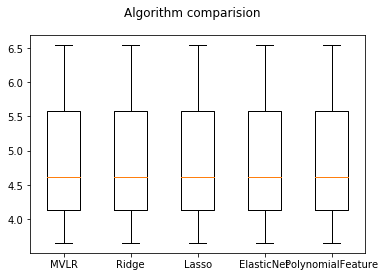

In [1528]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(m1,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1529]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.var(rmse,ddof=1),name))

0.833994621251135
RMSE scores:4.934 (+/-2.16158)[Linear_Regression]
0.8326275232070939
RMSE scores:4.950 (+/-2.21801)[Ridge]
0.7227960241919251
RMSE scores:5.908 (+/-3.91106)[Lasso]
0.7398835620057647
RMSE scores:5.729 (+/-3.67902)[ElasticNet]


In [1530]:
X['Cylinders']=df['Cylinders']

In [1531]:
X['DriveTrain']=df['DriveTrain']

In [1532]:
X.shape

(93, 21)

In [1533]:
cols=['DriveTrain','Cylinders']
newdum=pd.get_dummies(data=X,columns=cols)


In [1534]:
newdum.shape

(93, 28)

In [1535]:
newdum.head()

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city1,MPG.highway1,MPG.city_square,MPG.highway_square,MPG.city_MPG.highway,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1,25.0,31.0,625.0,775.0,961.0,0,1,0,0,1,0,0,0,0
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0,18.0,25.0,324.0,450.0,625.0,0,1,0,0,0,0,1,0,0
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0,20.0,26.0,400.0,520.0,676.0,0,1,0,0,0,0,1,0,0
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0,19.0,26.0,361.0,494.0,676.0,0,1,0,0,0,0,1,0,0
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0,22.0,30.0,484.0,660.0,900.0,0,0,1,0,1,0,0,0,0


In [1536]:
newdrop=newdum.drop(['MPG.city1','MPG.highway1','EngineSize','Luggage.room','Rear.seat.room','Turn.circle','Fuel.tank.capacity'],axis=1)

In [1537]:
newdrop.shape

(93, 21)

MVLR: 5.809636 (0.550390)
Ridge: 5.809636 (0.550390)
Lasso: 5.809636 (0.550390)
ElasticNet: 5.809636 (0.550390)
PolynomialFeature: 5.809636 (0.550390)


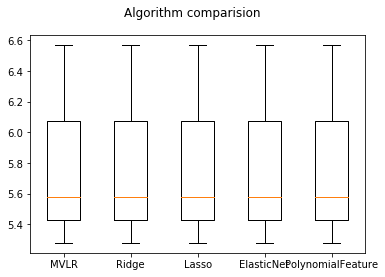

In [1538]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(m1,newdrop,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1539]:
newdrop.head()

,Horsepower,Rev.per.mile,Man.trans.avail,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city_square,MPG.highway_square,MPG.city_MPG.highway,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
0,140,2890,1,177,68,2705,0,0,1,625.0,775.0,961.0,0,1,0,0,1,0,0,0,0
1,200,2335,1,195,71,3560,1,0,0,324.0,450.0,625.0,0,1,0,0,0,0,1,0,0
2,172,2280,1,180,67,3375,0,1,0,400.0,520.0,676.0,0,1,0,0,0,0,1,0,0
3,172,2535,1,193,70,3405,1,0,0,361.0,494.0,676.0,0,1,0,0,0,0,1,0,0
4,208,2545,1,186,69,3640,0,1,0,484.0,660.0,900.0,0,0,1,0,1,0,0,0,0


In [1540]:
newdum.head()
dropx=newdum.drop(['EngineSize','Luggage.room','Rear.seat.room','Turn.circle','Fuel.tank.capacity'],axis=1)

In [1541]:
xml=X[['MPG.city1','MPG.highway1','Weight']]

qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(xml)
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()


,0,1,2,3,4,5,6,7,8,9
0,1.0,25.0,31.0,2705.0,625.0,775.0,67625.0,961.0,83855.0,7317025.0
1,1.0,18.0,25.0,3560.0,324.0,450.0,64080.0,625.0,89000.0,12673600.0
2,1.0,20.0,26.0,3375.0,400.0,520.0,67500.0,676.0,87750.0,11390625.0
3,1.0,19.0,26.0,3405.0,361.0,494.0,64695.0,676.0,88530.0,11594025.0
4,1.0,22.0,30.0,3640.0,484.0,660.0,80080.0,900.0,109200.0,13249600.0


In [1542]:
x_qr_df=x_qr_df[[4,7,9]]

In [1543]:
x_qr_df

,4,7,9
0,625.0,961.0,7317025.0
1,324.0,625.0,12673600.0
2,400.0,676.0,11390625.0
3,361.0,676.0,11594025.0
4,484.0,900.0,13249600.0
5,484.0,961.0,8294400.0
6,361.0,784.0,12040900.0
7,256.0,625.0,16851025.0
8,361.0,729.0,12215025.0
9,256.0,625.0,13104400.0


In [1544]:
x_qr_df.rename({4:'MPG.city_square',7:'MPG.highway_square',9:'weight_square'},axis=1,inplace=True)


In [1545]:
newx

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0
5,110,2.2,16.0,28.0,2565,41,0,16.4,189,69,2880,0,1,0
6,170,3.8,17.0,30.5,1570,42,0,18.0,200,74,3470,0,1,0
7,180,5.7,21.0,30.5,1320,45,0,23.0,216,78,4105,0,1,0
8,170,3.8,14.0,26.5,1690,41,0,18.8,198,73,3495,0,1,0
9,200,4.9,18.0,35.0,1510,43,0,18.0,206,73,3620,0,1,0


In [1546]:
df_final=pd.concat([newx,x_qr_df,y],axis=1)

In [1547]:
newdrop.head()

,Horsepower,Rev.per.mile,Man.trans.avail,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city_square,MPG.highway_square,MPG.city_MPG.highway,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
0,140,2890,1,177,68,2705,0,0,1,625.0,775.0,961.0,0,1,0,0,1,0,0,0,0
1,200,2335,1,195,71,3560,1,0,0,324.0,450.0,625.0,0,1,0,0,0,0,1,0,0
2,172,2280,1,180,67,3375,0,1,0,400.0,520.0,676.0,0,1,0,0,0,0,1,0,0
3,172,2535,1,193,70,3405,1,0,0,361.0,494.0,676.0,0,1,0,0,0,0,1,0,0
4,208,2545,1,186,69,3640,0,1,0,484.0,660.0,900.0,0,0,1,0,1,0,0,0,0


In [1548]:
df_final.head()

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city_square,MPG.highway_square,weight_square,Price
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1,625.0,961.0,7317025.0,15.9
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0,324.0,625.0,12673600.0,33.9
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0,400.0,676.0,11390625.0,29.1
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0,361.0,676.0,11594025.0,37.7
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0,484.0,900.0,13249600.0,30.0


In [1549]:
df_final.shape

(93, 18)

In [1550]:
df_final['MPG.city']=df['MPG.city']
df_final['MPG.highway']=df['MPG.highway']

In [1551]:
X_final=df_final.drop('Price',axis=1)
y_final=df['Price']

MVLR: 5.102227 (0.883784)
Ridge: 5.102227 (0.883784)
Lasso: 5.102227 (0.883784)
ElasticNet: 5.102227 (0.883784)
PolynomialFeature: 5.102227 (0.883784)


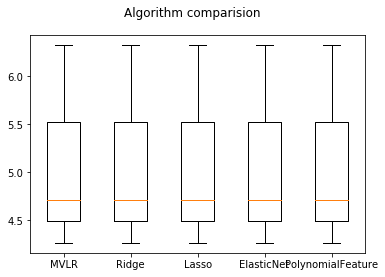

In [1552]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(m1,X_final,y_final,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1553]:
X_final.head()
X=X_final.drop(['MPG.city_square','MPG.highway_square','weight_square'],axis=1)

In [1554]:
xml=X[['MPG.city','MPG.highway']]

qr=PolynomialFeatures(degree=3)
x_qr=qr.fit_transform(xml)
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,25.0,31.0,625.0,775.0,961.0,15625.0,19375.0,24025.0,29791.0
1,1.0,18.0,25.0,324.0,450.0,625.0,5832.0,8100.0,11250.0,15625.0
2,1.0,20.0,26.0,400.0,520.0,676.0,8000.0,10400.0,13520.0,17576.0
3,1.0,19.0,26.0,361.0,494.0,676.0,6859.0,9386.0,12844.0,17576.0
4,1.0,22.0,30.0,484.0,660.0,900.0,10648.0,14520.0,19800.0,27000.0


In [1555]:
x_qr_df=x_qr_df[[3,6,5,9]]
x_qr_df.head()

,3,6,5,9
0,625.0,15625.0,961.0,29791.0
1,324.0,5832.0,625.0,15625.0
2,400.0,8000.0,676.0,17576.0
3,361.0,6859.0,676.0,17576.0
4,484.0,10648.0,900.0,27000.0


In [1556]:
x_qr_df.columns=['citysqr','citycube','highwaysqr','highwaycube']

In [1557]:
X_final.head()

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,MPG.city_square,MPG.highway_square,weight_square,MPG.city,MPG.highway
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1,625.0,961.0,7317025.0,25,31
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0,324.0,625.0,12673600.0,18,25
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0,400.0,676.0,11390625.0,20,26
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0,361.0,676.0,11594025.0,19,26
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0,484.0,900.0,13249600.0,22,30


In [1723]:
X_new=X_final.drop(['MPG.city_square','MPG.highway_square','MPG.city','MPG.highway'],axis=1)

In [1724]:
x_qr_df

,citysqr,citycube,highwaysqr,highwaycube
0,625.0,15625.0,961.0,29791.0
1,324.0,5832.0,625.0,15625.0
2,400.0,8000.0,676.0,17576.0
3,361.0,6859.0,676.0,17576.0
4,484.0,10648.0,900.0,27000.0
5,484.0,10648.0,961.0,29791.0
6,361.0,6859.0,784.0,21952.0
7,256.0,4096.0,625.0,15625.0
8,361.0,6859.0,729.0,19683.0
9,256.0,4096.0,625.0,15625.0


In [1725]:
df_final=pd.concat([X_new,x_qr_df,y],axis=1)

In [1726]:
df_final.head()

,Horsepower,EngineSize,Luggage.room,Rear.seat.room,Rev.per.mile,Turn.circle,Man.trans.avail,Fuel.tank.capacity,Length,Width,Weight,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,weight_square,citysqr,citycube,highwaysqr,highwaycube,Price
0,140,1.8,11.0,26.5,2890,37,1,13.2,177,68,2705,0,0,1,7317025.0,625.0,15625.0,961.0,29791.0,15.9
1,200,3.2,15.0,30.0,2335,38,1,18.0,195,71,3560,1,0,0,12673600.0,324.0,5832.0,625.0,15625.0,33.9
2,172,2.8,14.0,28.0,2280,37,1,16.9,180,67,3375,0,1,0,11390625.0,400.0,8000.0,676.0,17576.0,29.1
3,172,2.8,17.0,31.0,2535,37,1,21.1,193,70,3405,1,0,0,11594025.0,361.0,6859.0,676.0,17576.0,37.7
4,208,3.5,13.0,27.0,2545,39,1,21.1,186,69,3640,0,1,0,13249600.0,484.0,10648.0,900.0,27000.0,30.0


In [1727]:
df_final.shape

(93, 20)

In [1728]:
X_final=df_final.drop('Price',axis=1)
y_final=df['Price']

In [1729]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
m4=ElasticNet()

models=[]
models.append(('MVLR',m1))
models.append(('Ridge',m2))
models.append(('Lasso',m3))
models.append(('ElasticNet',m4))

MVLR: 5.190754 (0.885038)
Ridge: 5.166482 (0.979816)
Lasso: 5.976655 (1.476120)
ElasticNet: 5.858084 (1.456395)


C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080.5699410208879, tolerance: 0.6704083870967743
  positive)
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750.0104513256475, tolerance: 0.6058557419354839
  positive)
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 557.4505729541901, tolerance: 0.43261974193548397
  positive)
C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the nu

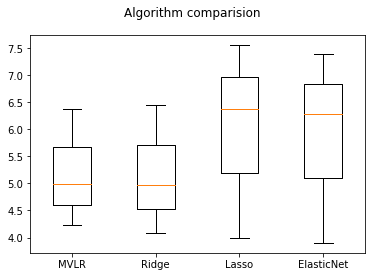

In [1731]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X_final,y_final,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1734]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(X_final,y_final):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        #Y_pred_real_scale=sc.inverse_transform(Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.std(rmse,ddof=1),name))

0.833994621251135
RMSE scores:4.934 (+/-1.47023)[Linear_Regression]
0.8326275232070939
RMSE scores:4.950 (+/-1.48930)[Ridge]
0.7227960241919251
RMSE scores:5.908 (+/-1.97764)[Lasso]
0.7398835620057647
RMSE scores:5.729 (+/-1.91808)[ElasticNet]


# With PCA

In [5]:
X=df[['MPG.city','MPG.highway','DriveTrain','Cylinders','EngineSize','AirBags','Fuel.tank.capacity','Horsepower','Rev.per.mile','Turn.circle','Man.trans.avail','Length','Width','Weight','Rear.seat.room','Luggage.room']]
y=df[['Price']]

In [6]:
X['Rear.seat.room'].fillna(X['Rear.seat.room'].median(),inplace=True)
X['Luggage.room'].fillna(X['Luggage.room'].median(),inplace=True)

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
cols=['AirBags','Cylinders','DriveTrain']
Xnew=pd.get_dummies(data=X,columns=cols)

In [11]:
Xnew['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in Xnew.columns:
    Xnew[i]=sc.fit_transform(Xnew[[i]])

In [13]:
Xnew.shape

(93, 25)

In [1651]:
Xnew.shape

(93, 25)

In [15]:
import numpy as np

In [16]:
eig_val,eig_vec=np.linalg.eig(Xnew.cov())

In [1653]:
eig_val

array([ 1.05639825e+01,  2.21623553e+00,  1.97742222e+00,  1.64815576e+00,
        1.46788965e+00,  1.34235055e+00,  1.13872609e+00,  1.03506372e+00,
        7.65259652e-01,  7.14761055e-01,  4.38176083e-01,  3.84028601e-01,
        3.49706736e-01,  3.19301571e-01,  2.46137236e-01,  1.76709440e-01,
        1.65648374e-01,  1.31646708e-01,  7.35021107e-02,  5.75413972e-02,
        2.52531681e-02,  3.42409581e-02, -8.79898656e-16,  4.04383980e-16,
        2.73323864e-16])

In [1654]:
eig_vec.shape

(25, 25)

In [17]:
eig_pairs=[(eig_val[index],eig_vec[:,index]) for index in range(len(eig_val))]

eig_pairs.sort()
eig_pairs.reverse()

eig_pairs

eig_val_sort=[eig_pairs[index][0] for index in range(len(eig_val))]
eig_vec_sort=[eig_pairs[index][1] for index in range(len(eig_val))]

In [18]:
tot=sum(eig_val_sort)
var_exp=[(i/tot)*100 for i in sorted(eig_val,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Cummulative Variance Explained ",cum_var_exp)

Cummulative Variance Explained  [ 41.80156524  50.57118541  58.39582389  64.9175585   70.72598205
  76.03764873  80.54357563  84.63931164  87.66743586  90.49573766
  92.22959572  93.74919276  95.13297856  96.39645144  97.37041383
  98.06965119  98.72512002  99.24604463  99.53689169  99.76458238
  99.90007349 100.         100.         100.         100.        ]


In [19]:
import matplotlib.pyplot as plt


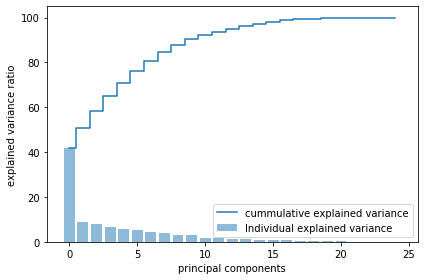

In [20]:
plt.figure(figsize=(6,4))
plt.bar(range(Xnew.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(Xnew.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
eig_vec_sort=np.array(eig_vec_sort[::]).T

In [22]:
P_reduce=eig_vec_sort[:,:19] #1 dimension which has low variance ratio we reduce

In [23]:
P_reduce.shape

(25, 19)

In [24]:
eig_vec_sort

array([[-2.63839794e-01,  2.67644361e-02, -9.34620552e-02,
        -2.45623861e-01,  1.77192956e-01,  7.96754634e-02,
        -9.30558590e-02,  8.41077096e-02, -7.12586561e-02,
        -2.79639325e-02,  6.39813081e-02, -6.21089822e-02,
         1.50205173e-01,  2.05650061e-01,  3.76282701e-01,
         1.61507206e-01, -6.58770368e-02, -9.43333556e-03,
         7.00212481e-03, -2.51940687e-01, -1.52922856e-02,
         7.01857181e-01, -1.86936794e-15,  3.62381937e-15,
        -5.49442129e-16],
       [-2.41945888e-01,  3.62035096e-02, -1.75155036e-01,
        -2.97150330e-01,  1.48628657e-01,  1.00719190e-01,
        -5.43253754e-02,  4.02919311e-02, -1.32064201e-01,
        -6.23124500e-02,  1.08391604e-01, -2.14133615e-01,
         2.84881217e-01,  2.71233477e-01,  3.24581217e-01,
        -8.75207444e-02, -9.15017698e-02, -5.53803047e-02,
         1.65088074e-01,  7.25966489e-02, -1.55242627e-01,
        -6.07977553e-01,  2.10677802e-15, -1.35831633e-15,
        -4.26452157e-16],
    

In [1683]:
Xnew.shape

(93, 25)

In [25]:
dfpca=np.dot(Xnew,P_reduce)

In [28]:
X_PCA=pd.DataFrame(dfpca,columns='pc1 pc2 pc3 pc4 pc5 pc6 pc7 pc8 pc9 pc10 pc11 pc12 pc13 pc14 pc15 pc16 pc17 pc18 PC19'.split())
X_PCA.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,PC19
0,-2.816527,0.497053,0.176128,0.117975,-0.537464,-0.493366,0.931576,-0.604750,0.503712,0.336190,-0.060933,0.378631,0.159311,0.474485,0.102575,-0.024710,0.351348,-0.400916,-0.603019
1,2.050589,1.487548,0.888972,-0.403951,-1.722204,1.307262,-0.213741,0.511432,-0.337857,0.792945,-1.451143,-0.449669,-0.032373,-0.055079,-0.100060,-0.220113,0.573517,0.111511,-0.174756
2,0.530655,-0.016966,0.077564,0.983354,-0.154461,1.244173,-1.161162,0.025977,1.131486,-0.289951,-1.413055,-0.502291,-0.382360,-0.401060,0.089780,-0.010485,0.315937,-0.147938,0.189447
3,1.802487,1.692454,0.787753,-0.372105,-1.604791,0.853400,-0.551237,0.484634,-0.962714,0.646607,-1.936217,-0.788848,-0.388678,0.279091,-0.234143,0.141361,0.243153,0.513524,0.506671
4,1.048695,-2.852739,-0.415533,-0.159724,-0.646371,-0.430770,0.413227,0.530818,-0.100908,-0.864251,-1.046908,0.958889,0.036393,1.261200,0.587365,-0.444120,-1.132681,-0.036495,0.016067


In [32]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
m4=ElasticNet()

In [33]:
models=[]
models.append(('MVLR',m1))
models.append(('Ridge',m2))
models.append(('Lasso',m3))
models.append(('ElasticNet',m4))

MVLR: 5.114831 (0.742822)
Ridge: 5.046670 (0.796951)
Lasso: 6.247058 (1.732388)
ElasticNet: 6.038584 (1.598714)


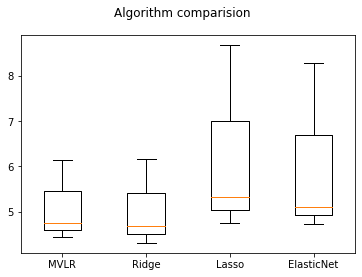

In [39]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X_PCA,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_result)))
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(np.sqrt(np.abs(cv_result))),np.std(np.sqrt(np.abs(cv_result)))))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [41]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(X_PCA,y):#indexes of test and train willbe stored
        Xtrain,Xtest=X_PCA.iloc[train_idx,:],X_PCA.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        #Y_pred_real_scale=sc.inverse_transform(Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.std(rmse,ddof=1),name))

0.8537252405727722
RMSE scores:5.115 (+/-0.90977)[Linear_Regression]
0.8525443440037934
RMSE scores:5.047 (+/-0.97606)[Ridge]
0.6608395986853068
RMSE scores:6.247 (+/-2.12173)[Lasso]
0.6994228273735645
RMSE scores:6.039 (+/-1.95802)[ElasticNet]


In [1692]:
X_PCA.shape

(93, 18)

In [1693]:
m1.fit(X_PCA,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1694]:
m1.predict([X_PCA.iloc[0,:]])

array([[13.85406475]])

In [1695]:
y.iloc[0]

Price    15.9
Name: 0, dtype: float64